In [1]:
import os
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:
img_width=256; img_height=256
batch_size=16

In [4]:
#Training_dir = 'C:/Users/Mohan/Desktop/dataset/trainsample'
Training_dir = 'dataset/train'

In [5]:
Training_dir

'dataset/train'

In [6]:
train_datagen = ImageDataGenerator(rescale = 1/255.0)

In [7]:
train_generator = train_datagen.flow_from_directory(Training_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width)
                                                    )

Found 1 images belonging to 2 classes.


In [8]:
#Validation_dir = 'C:/Users/Mohan/Desktop/dataset/testsample/'
Validation_dir = 'dataset/validation/'

In [9]:
Validation_dir

'dataset/validation/'

In [10]:
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

In [11]:
validation_generator = validation_datagen.flow_from_directory(Validation_dir,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 1 images belonging to 2 classes.


In [20]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
best_model_file = 'dataset/CNN_best_weights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='accuracy', verbose = 1, save_best_only = True)

In [29]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               15745152  
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

In [31]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [32]:
history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator
                              )

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.7906 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - 0s 190ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 192ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 190ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 203ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 188ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 179ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0

In [33]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [34]:
epochs=range(len(acc))

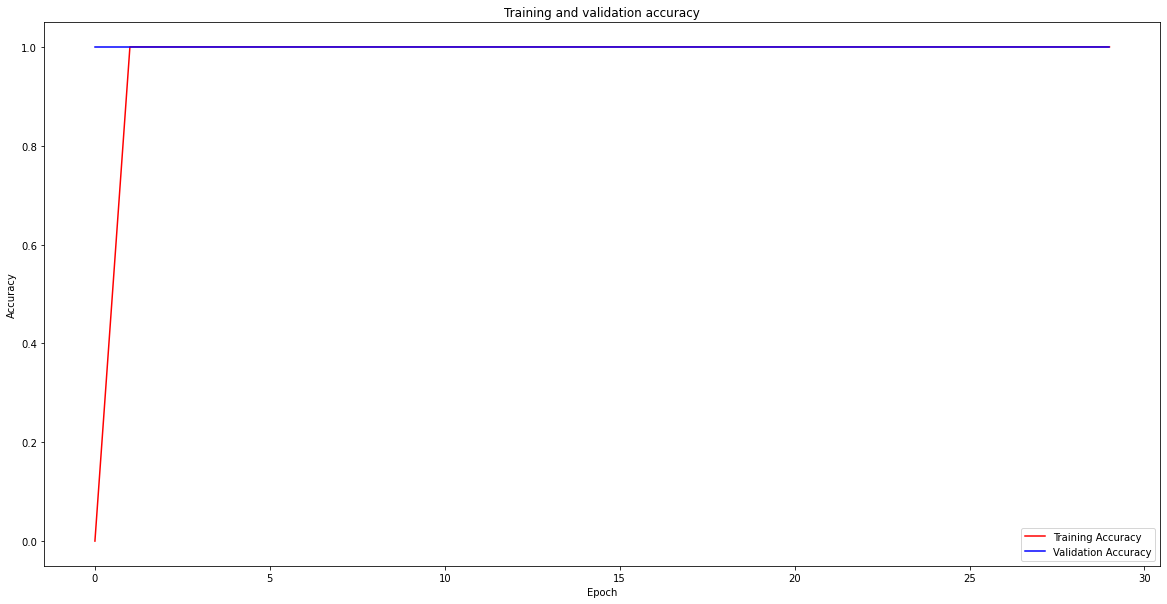

In [35]:
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

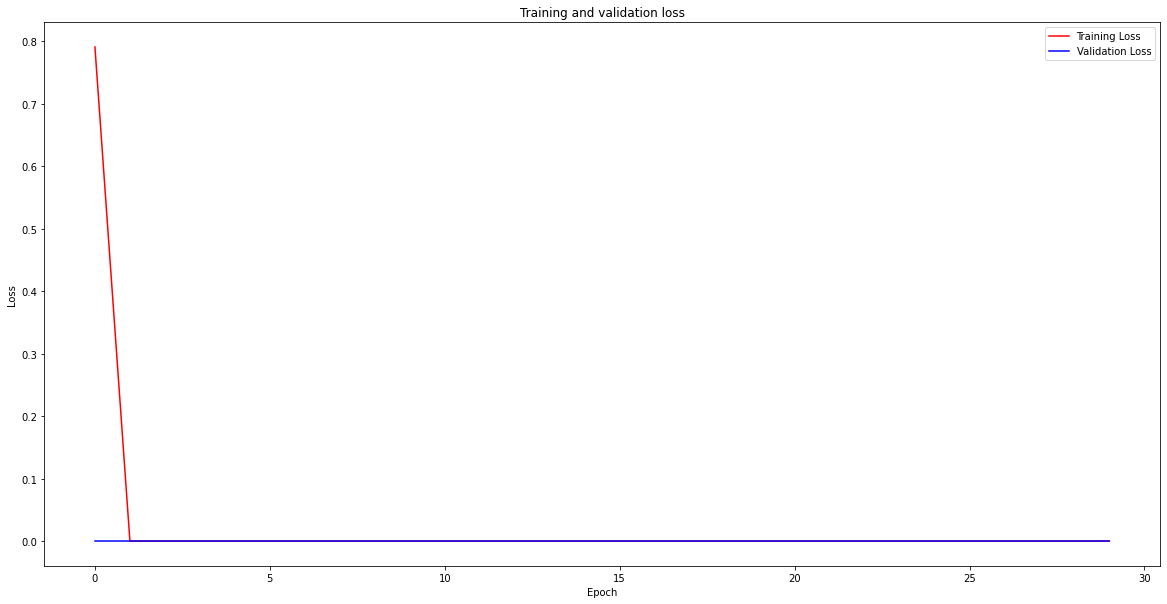

In [36]:
fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')